In [1]:
import pandas as pd
df =pd.read_csv('/content/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [2]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [8]:
pearson_corr = df.corr(method='pearson')['MEDV'].sort_values(ascending=False)

print("Pearson Correlation with MEDV:\n",pearson_corr)


Pearson Correlation with MEDV:
 MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64


In [12]:
high_corr_feature = pearson_corr[abs(pearson_corr) > 0.5]
display(high_corr_feature)

,MEDV
MEDV,1.000000
RM,0.695360
PTRATIO,-0.507787
LSTAT,-0.737663


In [10]:
feature_variables = [col for col in df.columns if col != 'MEDV']
print("Feature Variables:")
for feature in feature_variables:
    print(feature)

Feature Variables:
CRIM
ZN
INDUS
CHAS
NOX
RM
AGE
DIS
RAD
TAX
PTRATIO
B
LSTAT


In [9]:
num_columns = df.shape[1]
num_features = df.shape[1] - 1 # Assuming 'MEDV' is the target variable

print(f"Total number of columns in the dataset: {num_columns}")
print(f"Number of independent features (excluding 'MEDV'): {num_features}")

Total number of columns in the dataset: 14
Number of independent features (excluding 'MEDV'): 13


<Figure size 1200x800 with 0 Axes>

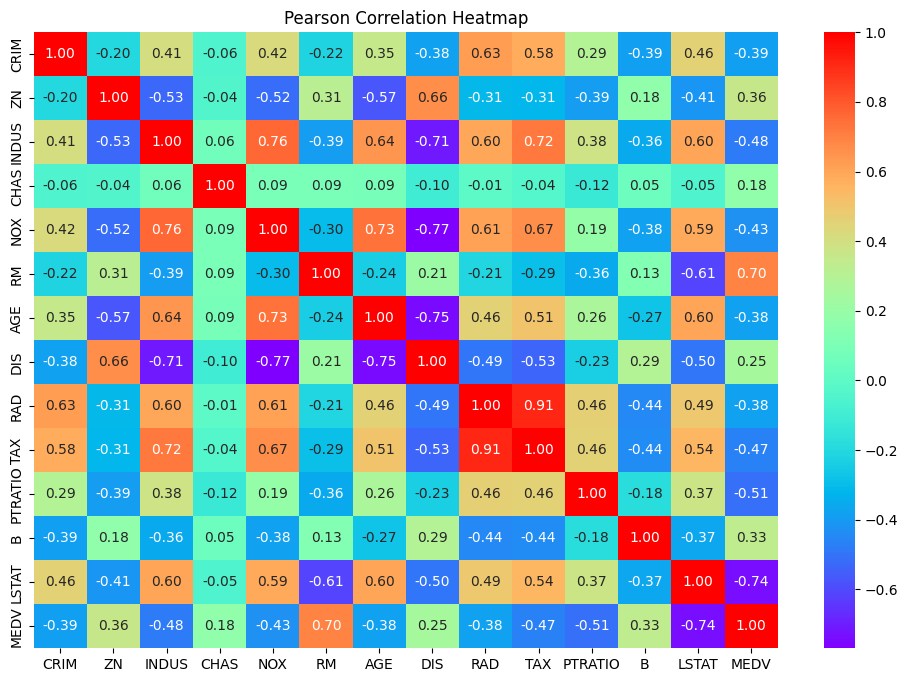

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
plt.figure(figsize=(12,8))
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True,cmap='rainbow',fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


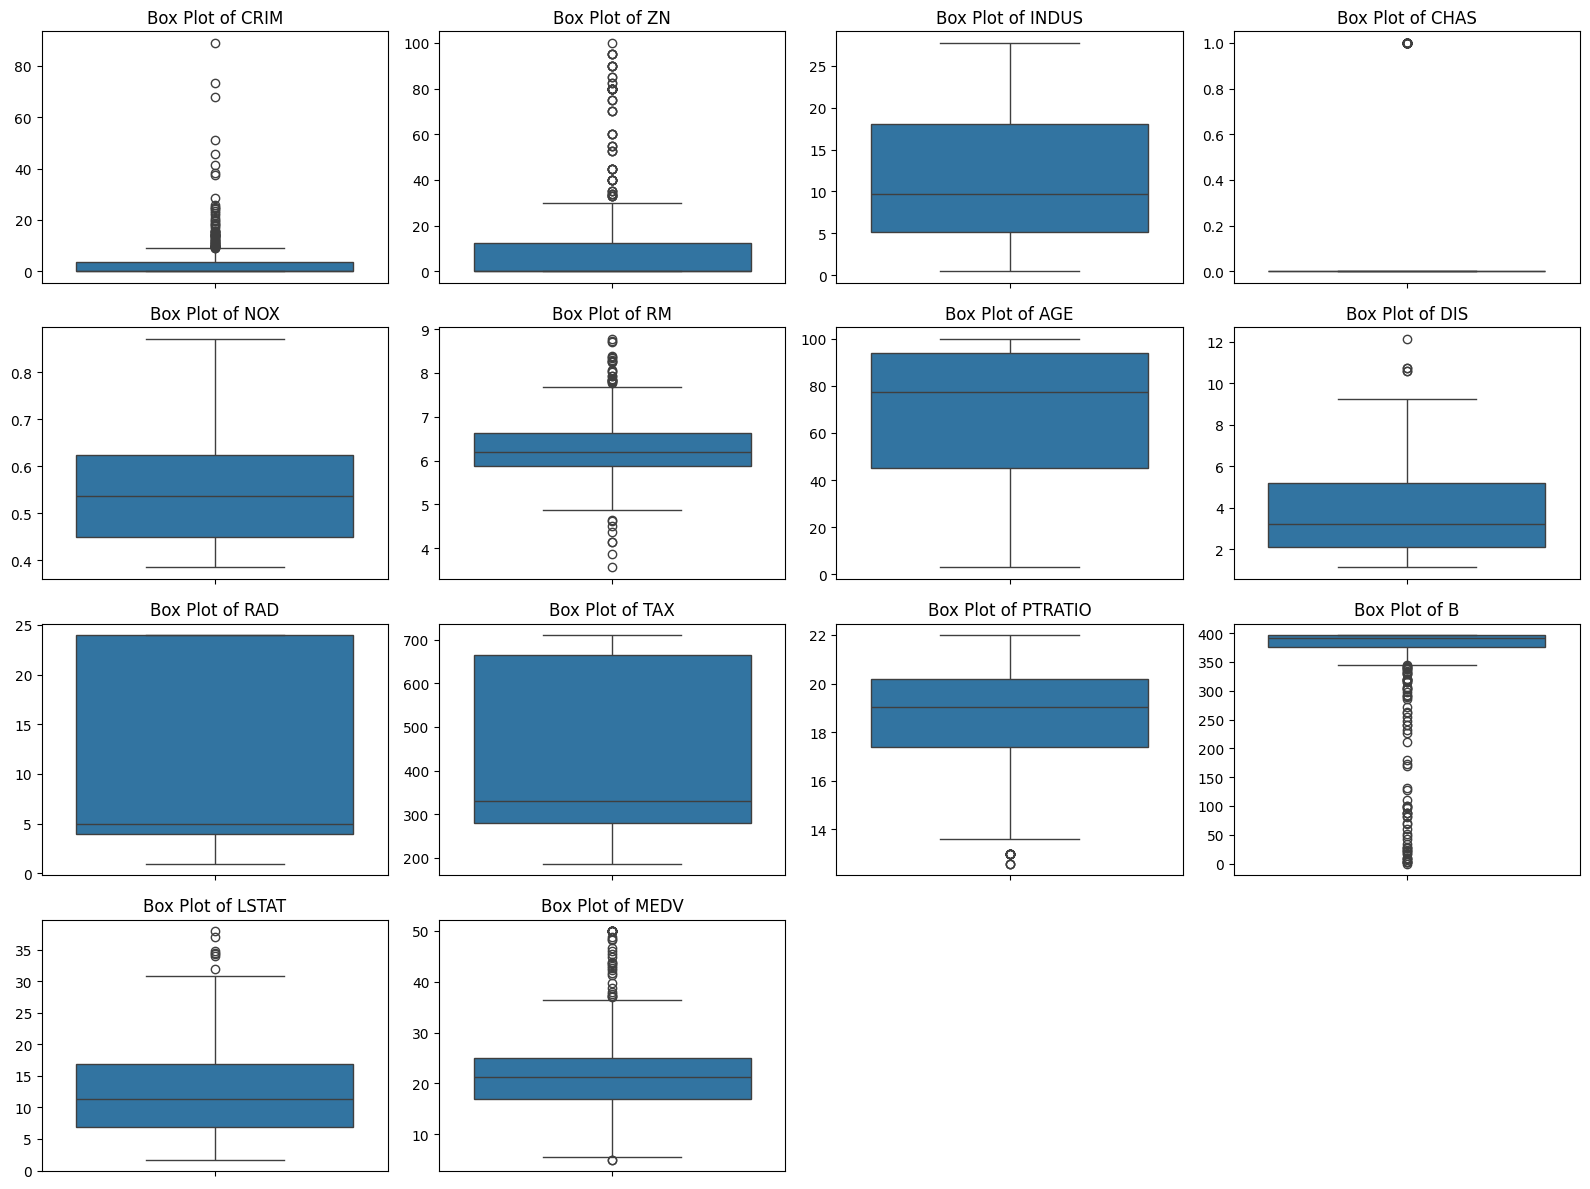

In [21]:
# Get numerical columns (excluding 'CHAS' and 'RAD' which are categorical/ordinal but stored as int64)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Exclude target variable 'MEDV' and 'CHAS'/'RAD' if we want to visualize strictly continuous features
# CHAS and RAD can be treated as categorical for outlier detection or kept if considered numerical in context
# For now, let's include all numerical columns for a general overview

num_plots = len(numerical_cols)
num_rows = (num_plots + 3) // 4 # Adjust for better layout
num_cols = 4

plt.figure(figsize=(num_cols * 4, num_rows * 3))

for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('')
plt.tight_layout()
plt.show()

In [28]:
# Make a copy of the original DataFrame to work on
df_cleaned = df.copy()

# Get numerical columns
numerical_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns.tolist()

print(f"Original DataFrame shape: {df_cleaned.shape}")

# Store the original number of rows to calculate how many were removed
original_rows = df_cleaned.shape[0]

for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers for the current column
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(f"DataFrame shape after outlier removal: {df_cleaned.shape}")
removed_rows = original_rows - df_cleaned.shape[0]
print(f"Number of rows removed due to outliers: {removed_rows}")

display(df_cleaned.head())
display(lower_bound, upper_bound)

Original DataFrame shape: (506, 14)
DataFrame shape after outlier removal: (214, 14)
Number of rows removed due to outliers: 292


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1


np.float64(11.387499999999998)

np.float64(33.0875)

In [25]:
# Calculate Q1 (25th percentile) for 'MEDV'
Q1_medv = df_cleaned['MEDV'].quantile(0.25)

# Calculate Q2 (50th percentile or median) for 'MEDV'
Q3_medv = df_cleaned['MEDV'].quantile(0.75)

print(f"The 25th percentile (Q1) for 'MEDV' is: {Q1_medv}")
print(f"The 50th percentile (Q3, Median) for 'MEDV' is: {Q3_medv}")

The 25th percentile (Q1) for 'MEDV' is: 19.4
The 50th percentile (Q3, Median) for 'MEDV' is: 24.3


In [31]:
def remove_outliers(df, column):
  for col in column:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower)&(df[col] <= upper)]
  return df

In [32]:
important_cols = high_corr_feature.index.tolist()
important_cols.append('MEDV')
df_clean = remove_outliers(df_cleaned, important_cols)

In [34]:
important_cols = high_corr_feature.index.tolist()
important_cols.append('MEDV')
df_clean = remove_outliers(df_cleaned, important_cols)
display(df_clean.head())
print(f"DataFrame shape after outlier removal on important columns: {df_clean.shape}")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1


DataFrame shape after outlier removal on important columns: (203, 14)


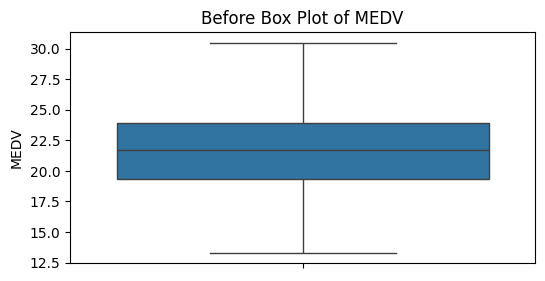

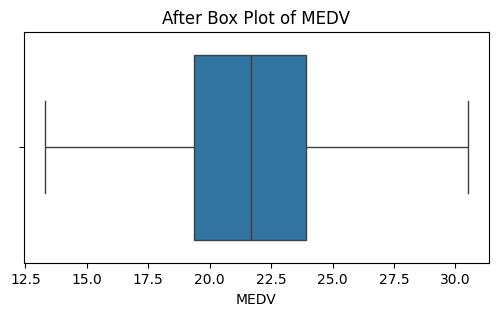

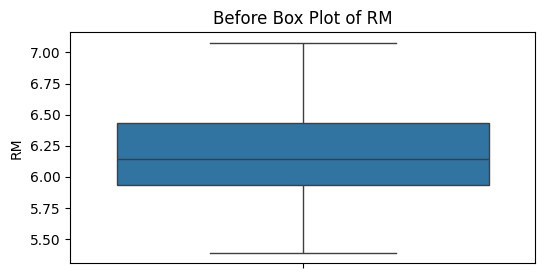

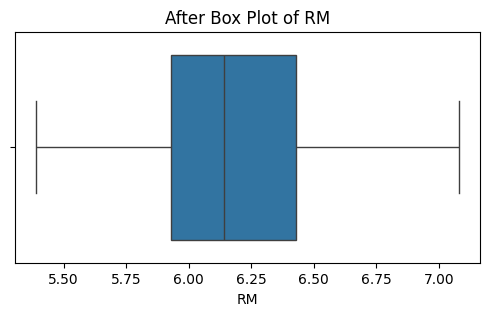

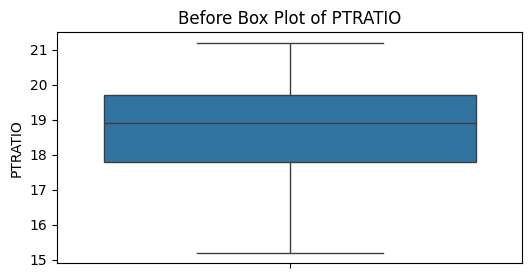

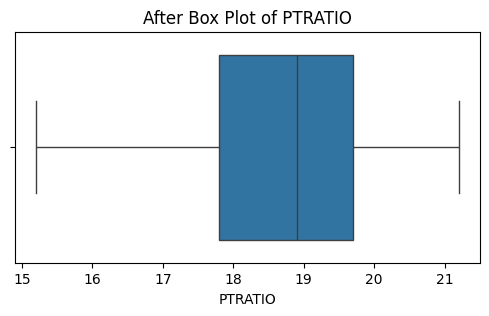

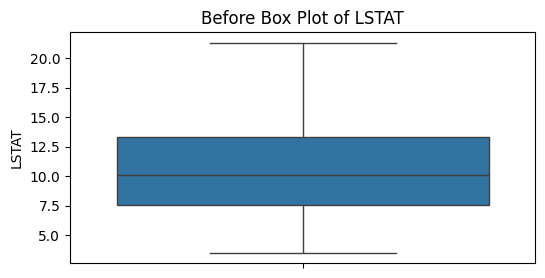

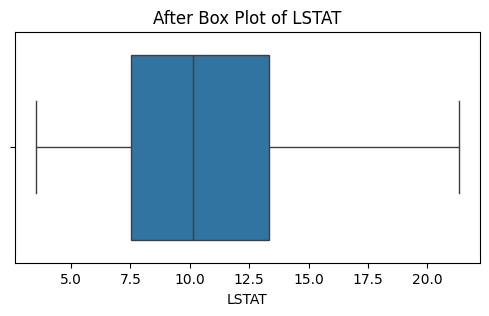

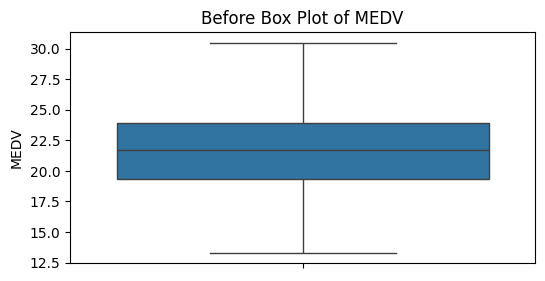

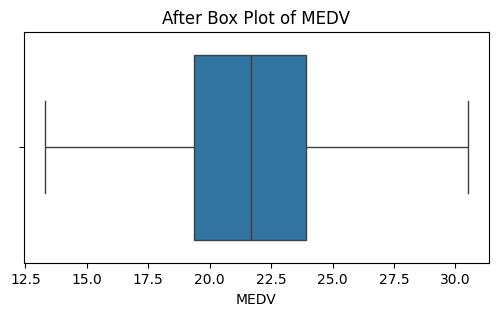

In [35]:
for col in important_cols:
  plt.figure(figsize=(6,3))
  sns.boxplot(y=df_clean[col])
  plt.title(f"Before Box Plot of {col}")

  plt.show()

  plt.figure(figsize=(6,3))
  sns.boxplot(x=df_clean[col])
  plt.title(f"After Box Plot of {col}")

  plt.show()

In [36]:
x=df_clean.drop('MEDV',axis=1)
y=df_clean['MEDV']